Exploratory Data Analysis


Roles to Explore:


In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#loading dataset
dataset= load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


Filter Data for USA Data Engineer Roles

In [2]:
df_DE_USA = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Engineer')].copy()
df_DE_USA

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
11,Data Engineer,Data Engineer,"Colorado Springs, CO (+3 others)",via The Muse,Full-time,False,"Texas, United States",2023-11-03 13:06:51,False,True,United States,None,NaN,NaN,Philips,"[python, qlik]","{'analyst_tools': ['qlik'], 'programming': ['p..."
26,Data Engineer,Data Engineer,United States,via LinkedIn,Full-time,False,Georgia,2023-09-15 13:56:18,True,False,United States,None,NaN,NaN,Infinite Computer Solutions,None,None
27,Data Engineer,"Principal Data Engineer (Lead), Knowledge Grap...","San Francisco, CA",via LinkedIn,Full-time,False,Georgia,2023-02-18 13:31:24,False,False,United States,None,NaN,NaN,Altos Labs,"[python, r, java]","{'programming': ['python', 'r', 'java']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785276,Data Engineer,Internship - Data Engineer,"Plainsboro Township, NJ",via SimplyHired,Full-time,False,Georgia,2023-01-18 06:48:35,False,False,United States,None,NaN,NaN,Novo Nordisk,"[word, excel, powerpoint]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
785462,Data Engineer,Sr. Data Engineer,"Washington, DC",via Indeed,Full-time,False,"New York, United States",2023-01-13 06:08:48,True,True,United States,None,NaN,NaN,Zscaler,"[sql, python, snowflake, airflow, tableau, pow...","{'analyst_tools': ['tableau', 'power bi', 'exc..."
785469,Data Engineer,IT Data Engineer,"Carol Stream, IL",via Indeed,Full-time,False,"California, United States",2023-01-07 06:07:11,False,True,United States,None,NaN,NaN,ZIP-PAK,"[java, python, sql]","{'programming': ['java', 'python', 'sql']}"
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."


In [3]:
df_plot = df_DE_USA['job_location'].value_counts().head(10).to_frame()
df_plot

,count
job_location,
Anywhere,6285
"New York, NY",1212
United States,1111
"Dallas, TX",835
"Atlanta, GA",764
"Chicago, IL",714
"Austin, TX",619
"Washington, DC",611
"Charlotte, NC",599


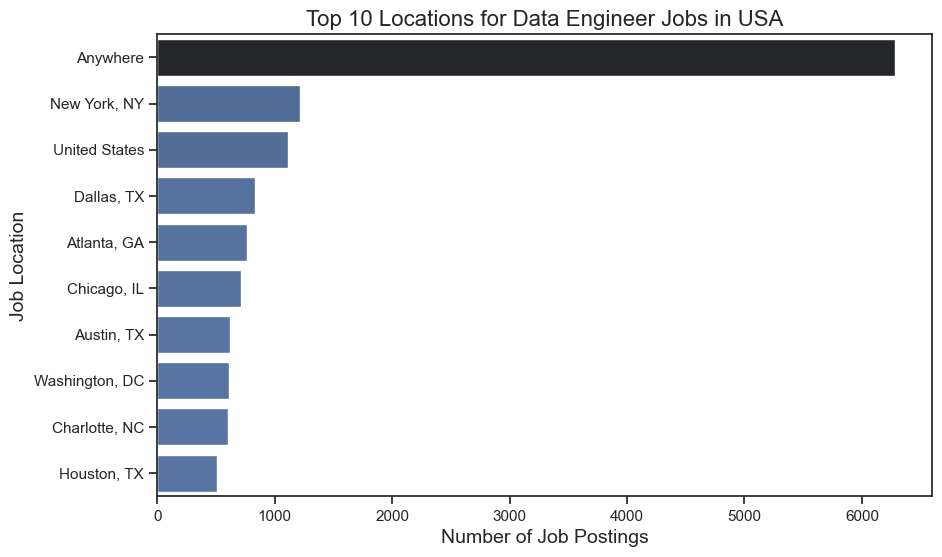

In [18]:
import seaborn as sns

# sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.set_theme(style="ticks")
sns.barplot(x= 'count' , y='job_location', data=df_plot, hue= 'count', dodge=False, palette='dark:b_r', legend=False)
plt.title('Top 10 Locations for Data Engineer Jobs in USA', fontsize=16)
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Job Location', fontsize=14)
plt.show()

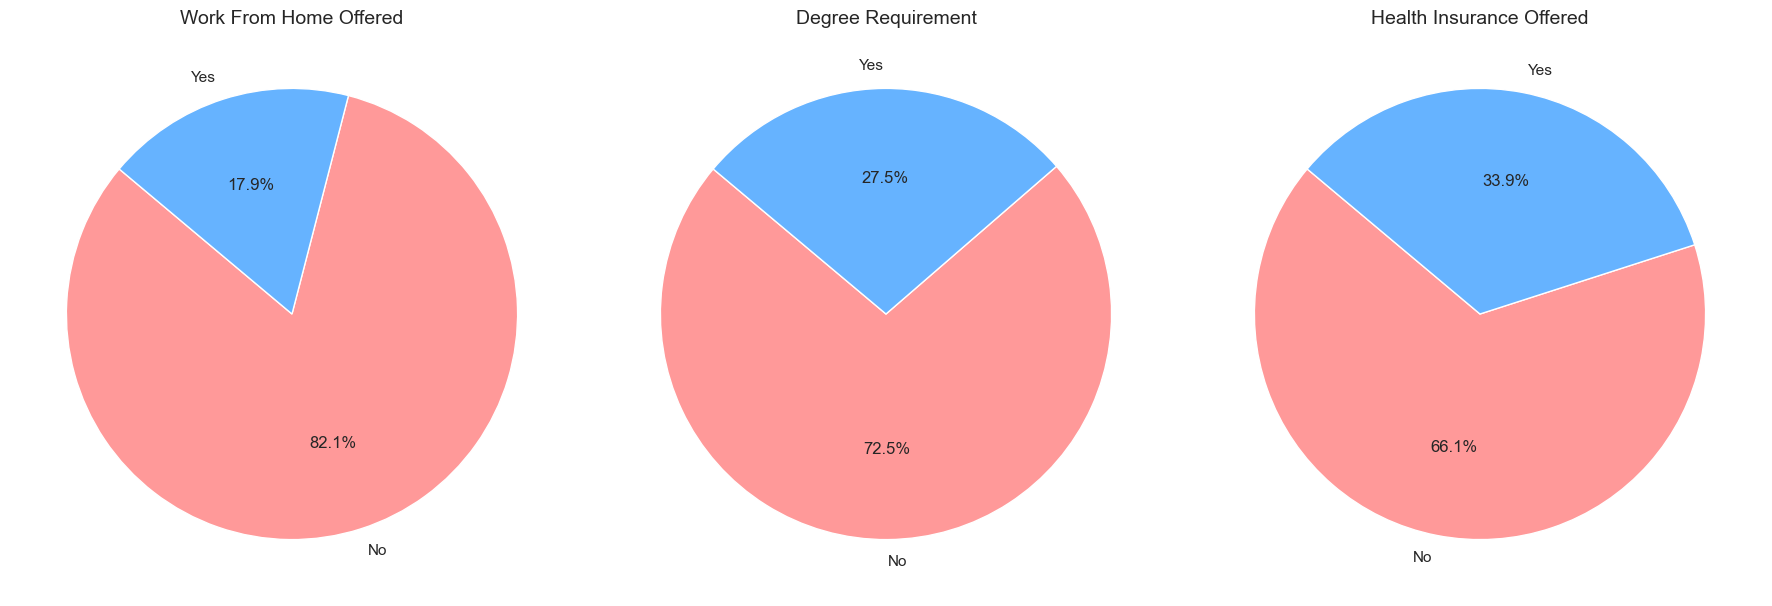

In [19]:
dict_col = {
    'job_work_from_home': 'Work From Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered',
}

fig, ax = plt.subplots(1, 3, figsize=(18, 6))

for i, (col, title) in enumerate(dict_col.items()):
    ax[i].pie(df_DE_USA[col].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
    ax[i].set_title(title, fontsize=14)

plt.tight_layout()
plt.show()


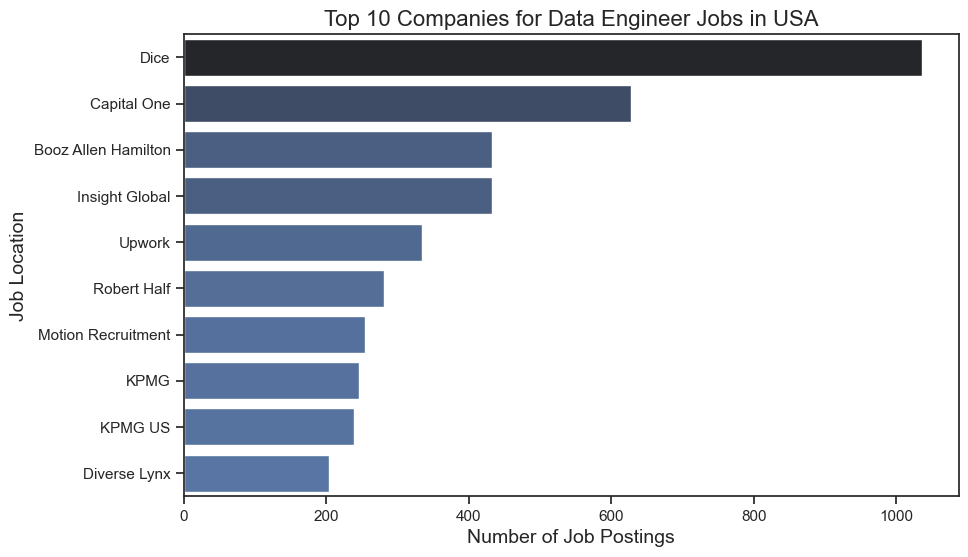

In [20]:
df_plot = df_DE_USA['company_name'].value_counts().head(10).to_frame()

plt.figure(figsize=(10,6))
sns.set_theme(style="ticks")
sns.barplot(x= 'count' , y='company_name', data=df_plot, hue= 'count', dodge=False, palette='dark:b_r', legend=False)
plt.title('Top 10 Companies for Data Engineer Jobs in USA', fontsize=16)
plt.xlabel('Number of Job Postings', fontsize=14)
plt.ylabel('Job Location', fontsize=14)
plt.show()